In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import MonthLocator, DateFormatter


In [26]:
# Importamos el csv 
# Parseamos las fechas y quitamos el index
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [27]:
# Limpia los datos filtrando los días en que las vistas de la página se encuentren en un alto de 2.5% del conjunto de datos o inferior de 2.5% del conjunto de datos.
df_clean = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


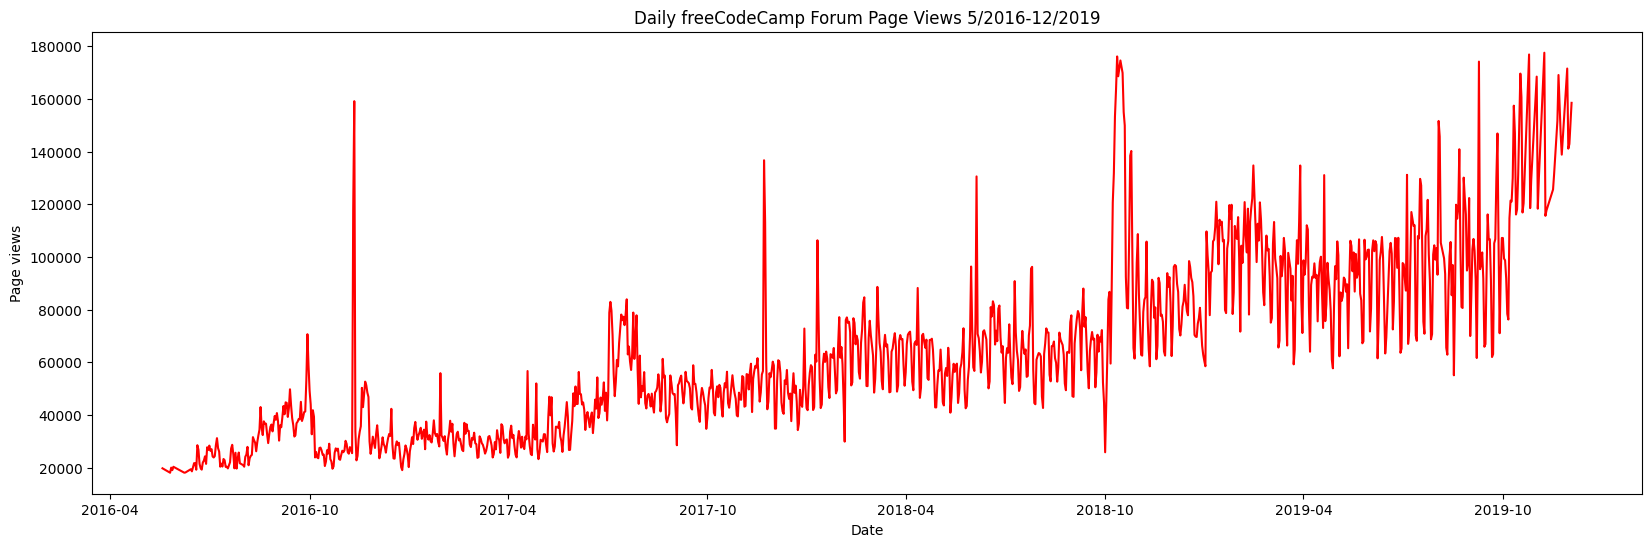

In [28]:
# Crea una función draw_line_plot que use Matplotlib para dibujar un gráfico de línea similar a "examples/Figure_1.png". El título debería ser Daily freeCodeCamp 
# Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debería ser Date y la etiqueta en el eje y debería ser Page Views.
plt.figure(figsize=(20,6))
plt.plot(df_clean.index, df_clean['value'], color='r', linewidth=1.5, label='Page views')

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page views')

years = MonthLocator(interval=6)
plt.gca().xaxis.set_major_locator(years)

plt.show()

In [29]:
# Crea una función draw_bar_plot que dibuje un gráfico de barras similar a "examples/Figure_2.png". Debería mostrar el promedio diario de vistas a la página para cada 
# mes agrupadas por año. La leyenda debería mostrar etiquetas mensuales y tener un título de Months. En la gráfica, la etiqueta en el eje x debería ser Years y la etiqueta 
# en el eje y debería ser Average Page Views.
df_bar = df_clean.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

fig, ax = plt.subplots(figsize=(18, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(df_bar['Years'].unique(), rotation=90, horizontalalignment='center')
plt.show()

,index,Years,Months,Average Page Views
0,0,2016.0,January,0
1,1,2016.0,February,0
2,2,2016.0,March,0
3,3,2016.0,April,0
4,"(2016, May)",NaN,NaN,19432
5,"(2016, June)",NaN,NaN,21875
6,"(2016, July)",NaN,NaN,24110
7,"(2016, August)",NaN,NaN,31049
8,"(2016, September)",NaN,NaN,41477
9,"(2016, October)",NaN,NaN,27398


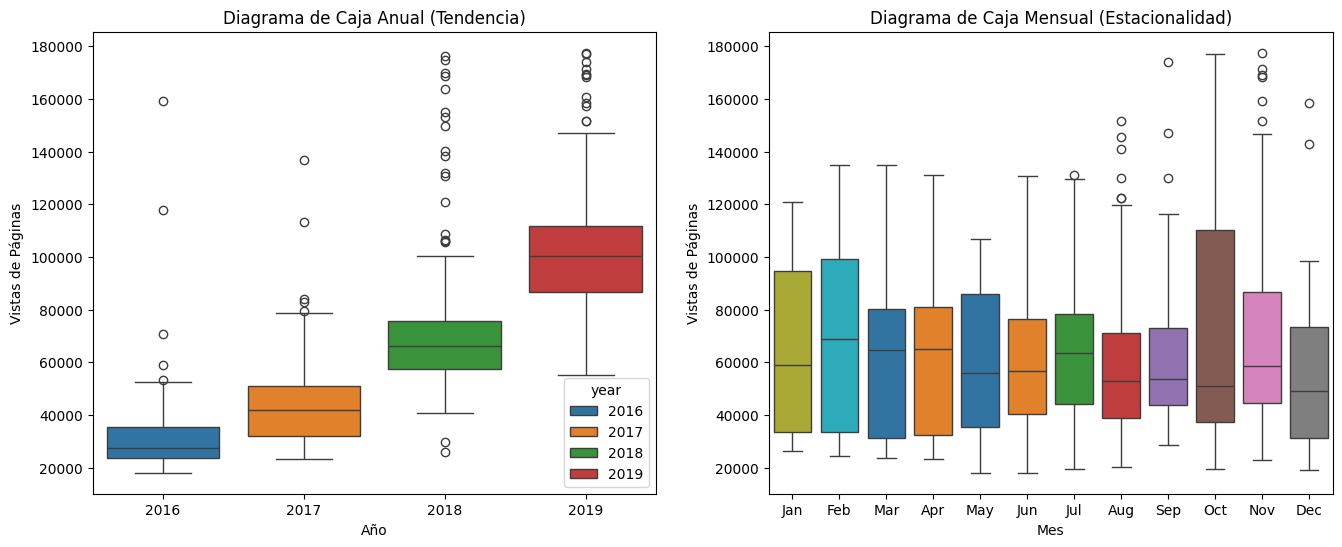

In [30]:
# Crea draw_box_plot una función que use Seaborn para dibujar dos puntos de caja adyacentes similar a "examples/Figure_3.png". Estos diagramas de caja deberían mostrar 
# como los valores son distribuídos dentro de un año dado o mes y como se compara con el tiempo. El título del primer gráfico debería ser Year-wise Box Plot (Trend) y 
# el título del segundo gráfico debería ser Month-wise Box Plot (Seasonality). Asegurese que la etiqueta mes mes en la parte inferior empiece en Jan y los ejes x y y 
# estén etiquetados correctamente. La plantilla incluye comandos para preparar los datos.
# Prepare data for box plots (this part is done!)
# Copia el DataFrame y resetea el índice
df_box = df_clean.copy().reset_index()

# Extrae el año y el mes de la fecha
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')

# Crea subgráficos para los box plots anuales y mensuales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot anual
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0], hue='year', palette='tab10')
axes[0].set_title("Diagrama de Caja Anual (Tendencia)")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Vistas de Páginas")

# Boxplot mensual
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1], hue='month', palette='tab10')
axes[1].set_title("Diagrama de Caja Mensual (Estacionalidad)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Vistas de Páginas")

plt.show()